In [2]:
import pandas as pd

dfR1 = pd.read_excel("Data/riket2023_åk9_np.xlsx", skiprows=8)
xlsx_file = pd.read_excel("Data/riket2023_åk9_np.xlsx", sheet_name=None, skiprows=8)
dfR1_eng = xlsx_file["Engelska"]
dfR1_mat = xlsx_file["Matematik"]
dfR1_sve = xlsx_file["Svenska"]
dfR1_sve_and = xlsx_file["Svenska som andraspråk"]

In [3]:
def rename_columns(df, rename_dict):
    return df.rename(columns=rename_dict)

rename_dict = {

    "Riket": "Plats",
    "Typ av huvudman": "Huvudman",
    "Totalt": "Totalt (A-F)",
    "Flickor": "Flickor (A-F)",
    "Pojkar": "Pojkar (A-F)",
    "Totalt ": "Totalt (A-E)",
    "Flickor ": "Flickor (A-E)",
    "Pojkar ": "Pojkar (A-E)",
    "Totalt  ": "Totalt (Poäng)",
    "Flickor  ": "Flickor (Poäng)",
    "Pojkar  ": "Pojkar (Poäng)",
}

dfR1_eng = rename_columns(xlsx_file["Engelska"], rename_dict)
dfR1_mat = rename_columns(xlsx_file["Matematik"], rename_dict) 
dfR1_sve = rename_columns(xlsx_file["Svenska"], rename_dict)
dfR1_sve_and = rename_columns(xlsx_file["Svenska som andraspråk"], rename_dict)

print(dfR1_sve_and.head())

   Plats    Huvudman Totalt (A-F) Flickor (A-F) Pojkar (A-F) Totalt (A-E)  \
0  Riket    Samtliga        14092          6447         7645         77.7   
1  Riket    Kommunal        11963          5495         6468         75.9   
2  Riket     Enskild         2122           949         1173         87.7   
3  Riket  Skolverket           ..            ..           ..           ..   

  Flickor (A-E) Pojkar (A-E) Totalt (Poäng) Flickor (Poäng) Pojkar (Poäng)  
0          81.6         74.3            9.4            10.2            8.7  
1            80         72.4              9             9.9            8.3  
2          90.9         85.2           11.1              12           10.4  
3            ..           ..             ..              ..             ..  


In [4]:
import dataframe_image as dfi

# Save the styled DataFrame to a PNG file
dfi.export(dfR1_eng, "Visualiseringar/A)-Statistic.png")

In [5]:
#Create the variables

#B)

TotalF = dfR1_mat["Flickor (A-F)"][0]
TotalP = dfR1_mat["Pojkar (A-F)"][0]

PassingGradeF = dfR1_mat["Flickor (A-E)"][0]
PassingGradeP = dfR1_mat["Pojkar (A-E)"][0]

#Create the function
#I wantted to round it up without importing the math function since it is too much. G
def calculate_percentage(total, passinggrade):
    temp = ((total * ((100 - passinggrade) / 100)) + 0.99999) // 1
    return int(temp)

# It now shows the math sheet.

print("Boys with passing grande:",(calculate_percentage(TotalF,PassingGradeF)))
print("Girls with passing grande:",(calculate_percentage(TotalP, PassingGradeP)))

Boys with passing grande: 5825
Girls with passing grande: 5798


C:\Users\Delic\AppData\Local\Temp\ipykernel_18264\2411367652.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(barplot.get_xticklabels(), fontsize=14)


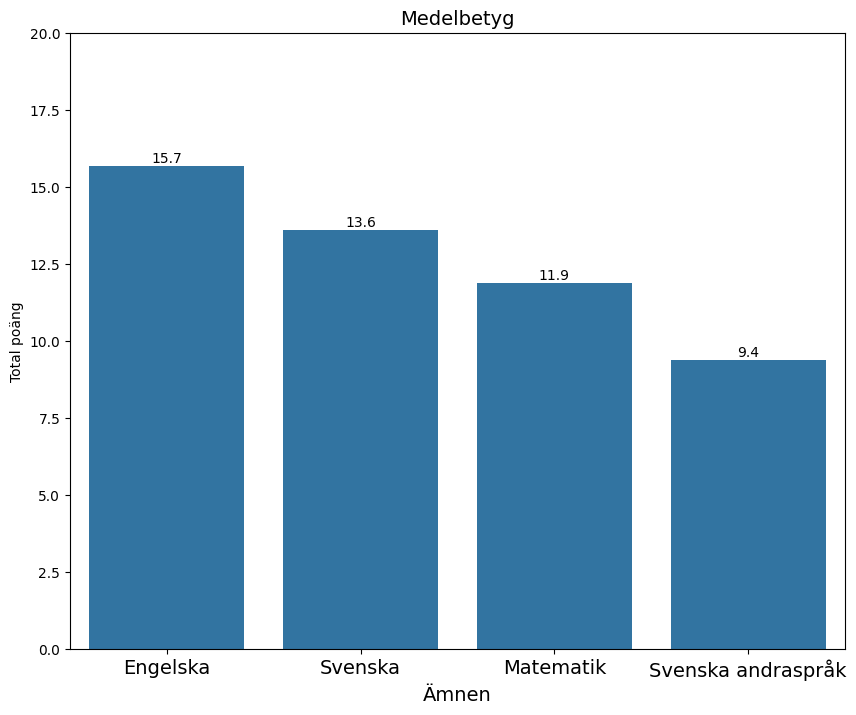

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#Some basic descending list, will try to make it more fancy and the export it.

eng_score = dfR1_eng["Totalt (Poäng)"][0]
mat_score = dfR1_mat["Totalt (Poäng)"][0]
sve_score = dfR1_sve["Totalt (Poäng)"][0]
sve_andra_score = dfR1_sve_and["Totalt (Poäng)"][0]

scores_df = pd.DataFrame({
    "Subject": ["Engelska", "Matematik", "Svenska", "Svenska andraspråk"],
    "Totalt Poäng": [eng_score, mat_score, sve_score, sve_andra_score]
}) 

#lets sort it
scores_df_sorted = scores_df.sort_values(by="Totalt Poäng", ascending=False)

plt.figure(figsize=(10, 8))
barplot = sns.barplot(x="Subject", y="Totalt Poäng",
                      data=scores_df_sorted)

#Lets add 20 as the max so its easier to read. Ugly 0 too much work to remove
plt.ylim(0, 20)
barplot.set_xticklabels(barplot.get_xticklabels(), fontsize=14)

#I wanted to get numbers above the staples as well.
for bar in barplot.patches:
    barplot.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 round(bar.get_height(), 2), 
                 ha="center", va="bottom", fontsize=10, color="black")      #Code from ChatGPT

plt.title("Medelbetyg" ,fontsize = 14)
plt.xlabel("Ämnen", fontsize= 14)
plt.ylabel("Total poäng")

plt.savefig("Visualiseringar/c)average_gradingscore.png",
            dpi=300, bbox_inches="tight")

plt.show()

In [32]:
import plotly.express as px

eng_score = dfR1_eng["Totalt (Poäng)"][0]
mat_score = dfR1_mat["Totalt (Poäng)"][0]
sve_score = dfR1_sve["Totalt (Poäng)"][0]
sve_andra_score = dfR1_sve_and["Totalt (Poäng)"][0]

scores_df = pd.DataFrame({
    "Subject": ["Engelska", "Matematik", "Svenska", "Svenska andraspråk"],
    "Totalt Poäng": [eng_score, mat_score, sve_score, sve_andra_score]
})

scores_df_sorted = scores_df.sort_values(by="Totalt Poäng", ascending=False)

#Copy pasta

fig = px.bar(scores_df_sorted, x="Subject",
             y="Totalt Poäng", text="Totalt Poäng")


fig.update_layout(
    title_text="Medelbetyg",
    xaxis_title="Ämne",
    yaxis_title="Total Poäng",
    yaxis=dict(range=[0, 20])  
)

for i, value in enumerate(scores_df_sorted["Totalt Poäng"]):
    fig.add_annotation(x=i, y=value, text=str(
        value), showarrow=False, yshift=10)


fig.write_image("Visualiseringar/c)Average_grades.png", scale=3)
fig.show()


In [7]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd


fig = make_subplots(rows=2, cols=2, subplot_titles=(
    "Engelska", "Matematik", "Svenska", "Svenska andraspråk"))


fig.add_trace(
    go.Bar(x=dfR1_eng["Huvudman"],
           y=dfR1_eng["Totalt (Poäng)"], name="Engelska"),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=dfR1_mat["Huvudman"],
           y=dfR1_mat["Totalt (Poäng)"], name="Matematik"),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=dfR1_sve["Huvudman"],
           y=dfR1_sve["Totalt (Poäng)"], name="Svenska"),
    row=2, col=1
)

fig.add_trace(
    go.Bar(
        x=dfR1_sve_and["Huvudman"][:-1],  
        y=dfR1_sve_and["Totalt (Poäng)"][:-1], 
        name="Svenska andraspråk"
    ),
    row=2, col=2
)


fig.write_image("Visualiseringar/d)Subplots.png", scale=3)
fig.update_layout(showlegend=False, title_text="Average Gradingscore")
fig.update_yaxes(range=[0, 25]) 


fig.show()

C:\Users\Delic\AppData\Local\Temp\ipykernel_15536\2073104196.py:15: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





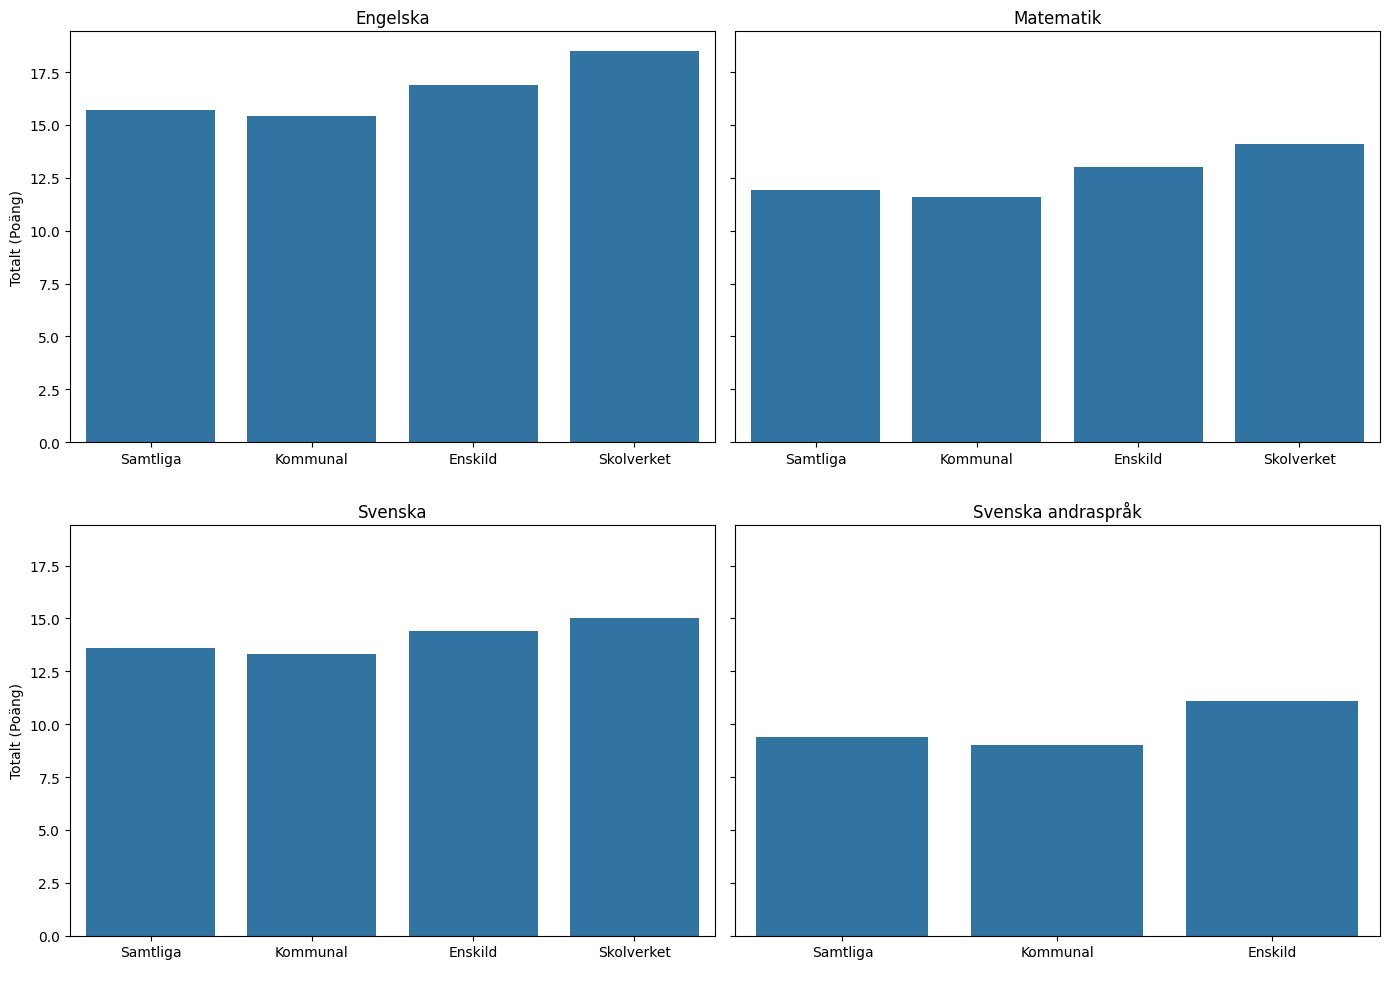

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# Remove whitespace
dfR1_eng.columns = dfR1_eng.columns.str.strip()
dfR1_mat.columns = dfR1_mat.columns.str.strip()
dfR1_sve.columns = dfR1_sve.columns.str.strip()
dfR1_sve_and.columns = dfR1_sve_and.columns.str.strip()


dfR1_sve_and["Totalt (Poäng)"] = pd.to_numeric(
dfR1_sve_and["Totalt (Poäng)"], errors="coerce")


dfR1_sve_and["Totalt (Poäng)"].fillna(0, inplace=True)

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axes = axes.flatten()
plt.subplots_adjust(hspace=0.4)


sns.barplot(ax=axes[0], x=dfR1_eng["Huvudman"], y=dfR1_eng["Totalt (Poäng)"])
axes[0].set_title("Engelska")
axes[0].set_xlabel(" ")

sns.barplot(ax=axes[1], x=dfR1_mat["Huvudman"], y=dfR1_mat["Totalt (Poäng)"])
axes[1].set_title("Matematik")
axes[1].set_xlabel(" ")

sns.barplot(ax=axes[2], x=dfR1_sve["Huvudman"], y=dfR1_sve["Totalt (Poäng)"])
axes[2].set_title("Svenska")
axes[2].set_xlabel(" ")

sns.barplot(ax=axes[3], x=dfR1_sve_and[:-1]["Huvudman"],
            y=dfR1_sve_and[:-1]["Totalt (Poäng)"])
axes[3].set_title("Svenska andraspråk")
axes[3].set_xlabel(" ")
plt.savefig("Visualiseringar/d)SubPlots.png",
            dpi=300, bbox_inches="tight")

plt.tight_layout() 
plt.show()

In [8]:
Tabell1B = pd.read_excel("Data/betyg_o_prov_riksnivå.xlsx",
                         sheet_name='Tabell 1B', skiprows=7, nrows=6)

In [9]:

Tabell1B.head()

,Unnamed: 0,Totalt,Flickor,Pojkar,Totalt.1,Flickor.1,Pojkar.1,Totalt.2,Flickor.2,Pojkar.2
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0


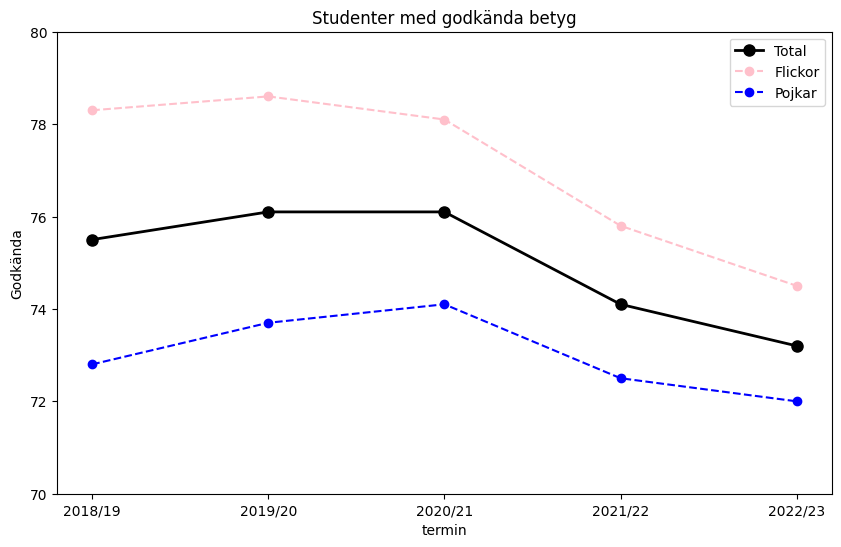

In [10]:
Tabell1B["Failure Rate Totalt"] = 100 - Tabell1B["Totalt.2"]
Tabell1B["Failure Rate Flickor"] = 100 - Tabell1B["Flickor.2"]
Tabell1B["Failure Rate Pojkar"] = 100 - Tabell1B["Pojkar.2"]


plt.figure(figsize=(10, 6))


plt.plot(Tabell1B["Unnamed: 0"], Tabell1B["Failure Rate Totalt"],
         marker="o", label="Total", linewidth=2, markersize=8, color="black")

plt.plot(Tabell1B["Unnamed: 0"], Tabell1B["Failure Rate Flickor"],
         marker="o", label="Flickor", linestyle="--", color="pink")


plt.plot(Tabell1B["Unnamed: 0"], Tabell1B["Failure Rate Pojkar"],
         marker="o", label="Pojkar", linestyle="--", color="blue")

plt.ylim(70, 80)


plt.legend()


plt.title("Studenter med godkända betyg")
plt.xlabel("termin")
plt.ylabel("Godkända")

plt.savefig("Visualiseringar/LineDiagramOverview.png",
            dpi=300, bbox_inches="tight")

plt.show()

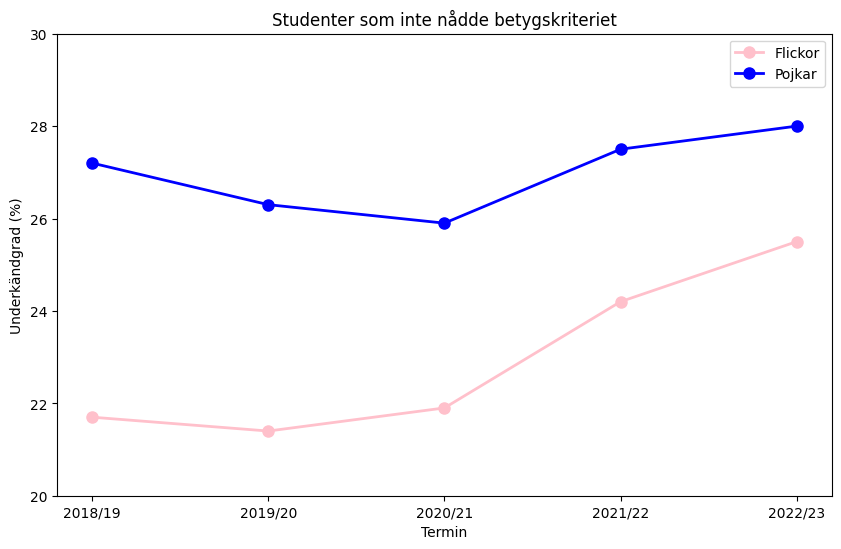

In [21]:
Tabell1B["Failure Rate Flickor"] = Tabell1B["Flickor.2"]
Tabell1B["Failure Rate Pojkar"] = Tabell1B["Pojkar.2"]


plt.figure(figsize=(10, 6))



plt.plot(Tabell1B["Unnamed: 0"], Tabell1B["Failure Rate Flickor"],
         marker="o", label="Flickor", linewidth=2, markersize=8, color="pink")


plt.plot(Tabell1B["Unnamed: 0"], Tabell1B["Failure Rate Pojkar"],
         marker="o", label="Pojkar", linewidth=2, markersize=8, color="blue")

plt.ylim(20, 30)


plt.legend()


plt.title("Studenter som inte nådde betygskriteriet")
plt.xlabel("Termin")
plt.ylabel("Underkändgrad (%)")

plt.savefig("Visualiseringar/ReversedDiagram.png",
            dpi=300, bbox_inches="tight")

plt.show()

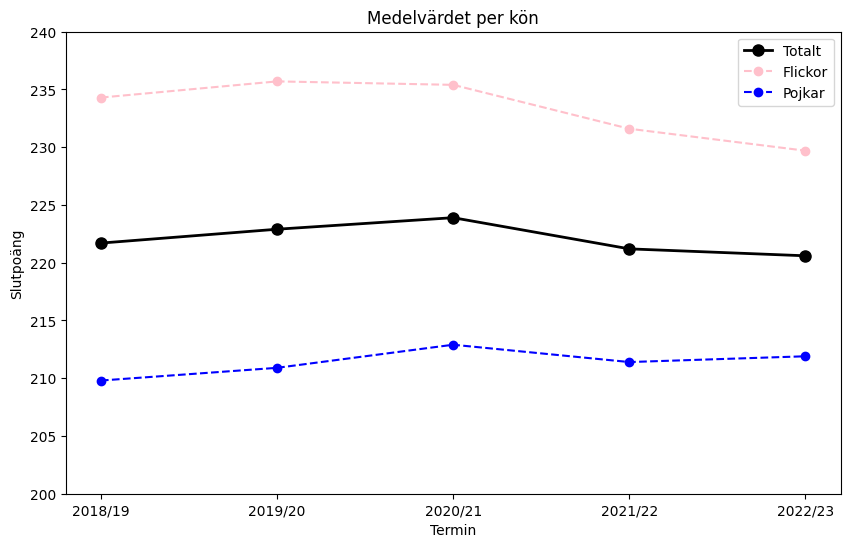

In [11]:
Tabell1B["Average_points_Total"] = Tabell1B["Totalt"]
Tabell1B["Average_points_Flickor"] = Tabell1B["Flickor"]
Tabell1B["Average_points_Pojkar"] = Tabell1B["Pojkar"]


plt.figure(figsize=(10, 6))


plt.plot(Tabell1B["Unnamed: 0"], Tabell1B["Average_points_Total"],
         marker="o", label="Totalt", linewidth=2, markersize=8, color="black")

plt.plot(Tabell1B["Unnamed: 0"], Tabell1B["Average_points_Flickor"],
         marker="o", label="Flickor", linestyle="--", color="pink")


plt.plot(Tabell1B["Unnamed: 0"], Tabell1B["Average_points_Pojkar"],
         marker="o", label="Pojkar", linestyle="--", color="blue")

plt.ylim(200, 240)


plt.legend()


plt.title("Medelvärdet per kön")
plt.xlabel("Termin")
plt.ylabel("Slutpoäng")

plt.savefig("Visualiseringar/AveragePointsbygender.png",
            dpi=300, bbox_inches="tight")

plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------------------


## c) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för
läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer.


För att förstå detta vill vi först få en överblick på datan och lösa eventuella problem.

Från datan så saknas det uppgifter från 3156 studenter. Vi vet inget med säkerhet om varför det saknas uppgifter eller vilken nivå studenterna ligger på så, de kommer fördelas procentuellt.
 

Utbildningsbakgrund hos föräldrar
totalt: 121369 studenter

| Utbildningsnivå            |    Studenter        | Procent     |
|-------------|------------|------|
| **Grundskola:** | 6,755   | (5.6%) |
| **Gymnasie:**   | 37,825  | (31.2%) |
| **Universitet:**| 76,789  | (63.3%) |


Andel elever som saknar godkänt betyg i ett, flera eller alla ämnen:	

| Utbildningsnivå            |    Studenter       | Procent     |
|-------------|------------|------|
| **Grundskola:** | 4,290   | (63.5 %) |
| **Gymnasie:**   | 14,146  | (37.4%) |
| **Universitet(Kort):**   | 9,872 | (26.1%) |
| **Universitet(Lång):**| 10,520 | (13.7 %) |


Det finns ett väldigt starkt mönster mellan ens föräldrarsutbildningsnivå och hur väl deras barn presterar i skolan.

In [109]:
import math

df_Tabell_1A = pd.read_excel(
    "Data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1A")


# The rows of interest in the Excel file (35, 36, 39, and 40) are at index 34, 35, 38, 39 in pandas
categories = {
    "Grundskola": df_Tabell_1A.iloc[34, 1],
    "Gymnasie": df_Tabell_1A.iloc[35, 1],    
    "Universitet(Kort)": df_Tabell_1A.iloc[38, 1],

    "Universitet(Lång)": df_Tabell_1A.iloc[39, 1]
}

total_students = sum(categories.values())
percentages = {category: (count / total_students) *
               100 for category, count in categories.items()}

missing_students = 3156             #Missing students from defintioner row 81
additional_students = {category: (
    percentage / 100) * missing_students for category, percentage in percentages.items()}

#ChatGPT to make it round and count
additional_students_floor = {category: math.floor(
    count) for category, count in additional_students.items()}

remainder = missing_students - sum(additional_students_floor.values())
additional_students_floor["Grundskola"] += remainder

final_counts = {category: count + additional_students_floor.get(
    category, 0) for category, count in categories.items()}

new_total_students = sum(final_counts.values())

new_percentages = {category: (
    count / new_total_students) * 100 for category, count in final_counts.items()}

print("Final Counts:", final_counts)
print("New Percentages:", new_percentages)

Final Counts: {'Grundskola': 6755, 'Gymnasie': 37825, 'Universitet(Kort)': 19180, 'Universitet(Lång)': 57609}
New Percentages: {'Grundskola': 5.565671629493528, 'Gymnasie': 31.165289324292033, 'Universitet(Kort)': 15.80304690654121, 'Universitet(Lång)': 47.46599213967323}


In [108]:
import plotly.express as px
data_for_plot = pd.DataFrame({
    "Utbildningsnivå": list(final_counts.keys()),
    "Studenter": list(final_counts.values()),
    "Procent": [round(val, 1) for val in new_percentages.values()]  # Get rid of all the decimals
})


data_for_plot_sorted = data_for_plot.sort_values(
    by="Utbildningsnivå", ascending=True)


fig = px.bar(
    data_for_plot_sorted,
    x="Utbildningsnivå",
    y="Studenter",
    text="Procent"  
)

fig.add_annotation(
    x=-0.025,  # Use the XY axis to manevour the msg box.
    y=-0.3, 
    xref="paper",
    yref="paper",
    showarrow=False,
    text="3156 studenter som fördelades baserat på existerande fördelning*",
    font=dict(size=12),
    align="center",
    bgcolor="white",
)

# Update the layout of the chart
fig.update_traces(
    # Formatting the text as a percentage with 2 decimal places
    texttemplate='%{text:.2f}%',
    textposition='outside'
)
fig.update_layout(
    title_text="Distribution av Elevernas föräldrars utbildningsnivå",
    xaxis_title="Utbildningsnivå",
    yaxis_title="Mängd studenter",
    yaxis=dict(range=[0, max(data_for_plot['Studenter']) * 1.1]),
    margin=dict(b=100)  # increase bottom margin to make space for annotation
)


fig.write_image("Visualiseringar/distribution_Students.png", scale=3)
fig.show()

In [112]:
rows_to_skip = list(range(29))


Tabell1B_2 = pd.read_excel("Data/betyg_o_prov_riksnivå.xlsx",
    sheet_name="Tabell 1B", skiprows=rows_to_skip, nrows=7)

Tabell1B_2.set_index("Föräldrarnas högsta utbildning2", inplace=True)
Tabell1B_2 = Tabell1B_2.drop("Eftergymnasial utbildning")

rename_Tabell1B_2 = {
    "Gymnasial utbildning": "Gymnasienivå",
    "Förgymnasial utbildning": "Grundskolenivå",
    "Kort utbildning": "Universitet(Kort)",
    "Lång utbildning": "Universitet(Lång)"
}

Tabell1B_2.rename(index=rename_Tabell1B_2, inplace=True)

print(Tabell1B_2.head())

                                 Unnamed: 1  Unnamed: 2  Unnamed: 3  \
Föräldrarnas högsta utbildning2                                       
Grundskolenivå                        163.8       172.2       155.8   
Gymnasienivå                          197.4       207.2       188.2   
därav                                   NaN         NaN         NaN   
Universitet(Kort)                     218.9       228.4       209.7   
Universitet(Lång)                     245.8       254.5       237.6   

                                 Unnamed: 4  Unnamed: 5  Unnamed: 6  \
Föräldrarnas högsta utbildning2                                       
Grundskolenivå                        166.8       175.6       158.3   
Gymnasienivå                          203.2       213.6       193.3   
därav                                   NaN         NaN         NaN   
Universitet(Kort)                     226.5       236.6       216.6   
Universitet(Lång)                     256.0       265.3       247.2   

    

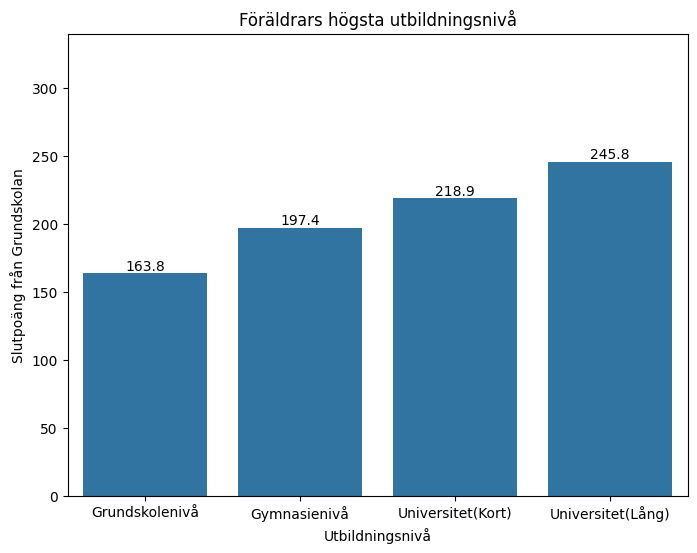

In [28]:
Order = Tabell1B_2.iloc[:,0]

plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=Order.index, y=Order.values)
plt.ylim(0, 340)

for index, value in enumerate(Order.values):
    plt.text(index, value, f"{value:.1f}", ha="center", va="bottom")

plt.title("Föräldrars högsta utbildningsnivå")
plt.ylabel("Slutpoäng från Grundskolan")
plt.xlabel("Utbildningsnivå")


plt.show()